# Mini project 3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
import nltk
warnings.filterwarnings('ignore')

In [3]:
file_path= r"C:\IOD\DATA\spam.csv"
spam =pd.read_csv(file_path, encoding='ISO-8859-1')

In [4]:
spam.shape

(5572, 5)

In [5]:
spam.info()
spam.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# Drop redundant columns and rename the columns
spam = spam.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)
spam.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
spam.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# 0=ham 1= spam
encoder=LabelEncoder()
spam['Target'] = encoder.fit_transform(spam['Target'])

In [8]:
spam.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
spam.isnull().sum()

Target    0
Text      0
dtype: int64

In [10]:
spam.duplicated().sum()

403

In [11]:
spam = spam.drop_duplicates(keep='first')

In [12]:
spam.shape

(5169, 2)

## EDA

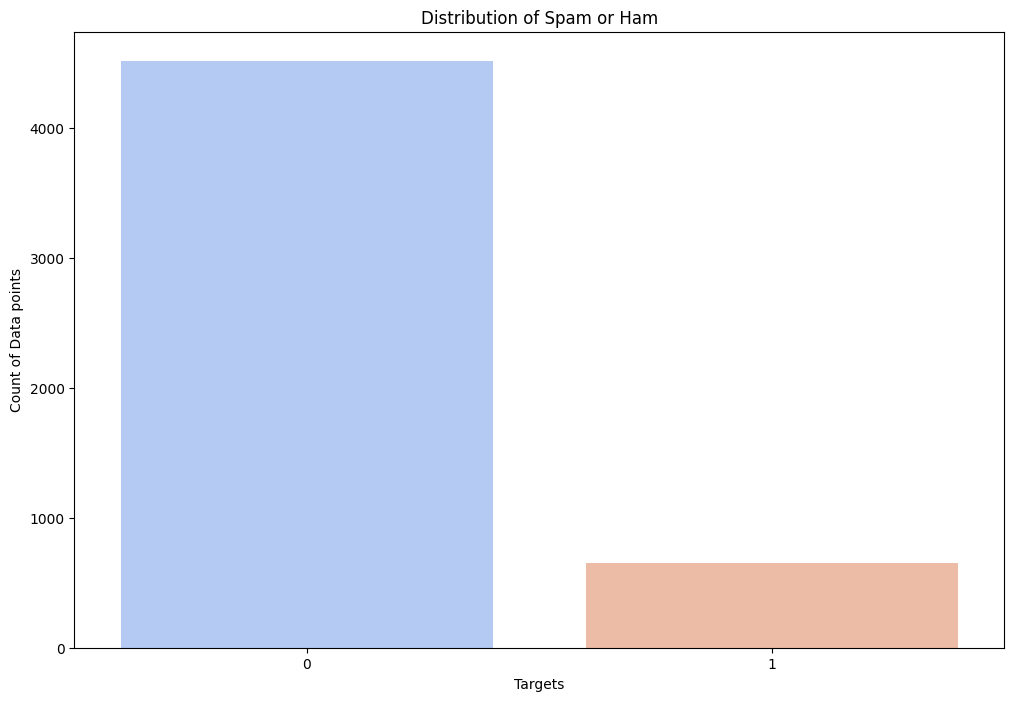

In [14]:
# Finding whether the data is imbalanced or not

plt.figure(figsize=(12, 8))
fg = sns.countplot(x=spam['Target'], palette='coolwarm')  # Use df and target column
fg.set_title("Distribution of Spam or Ham")
fg.set_xlabel("Targets")
fg.set_ylabel("Count of Data points")

plt.show()

In [15]:
spam['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

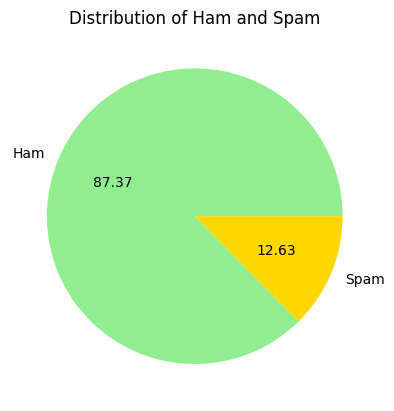

In [16]:
plt.pie(spam['Target'].value_counts(), 
        labels=['Ham', 'Spam'], 
        autopct='%0.2f', 
        colors=['#90ee90', '#ffd700']) 
plt.title('Distribution of Ham and Spam')
plt.show()

## Feature Engineering

In [18]:
# Adding new features
# no_char= Number of characters in the text message
# no_words= Number of words in the text message
# no_sent= Number of sentences in the text message

In [19]:
nltk.download('punkt')
spam['no_char'] = spam['Text'].apply(len)
spam['no_words'] = spam['Text'].apply(lambda x:len(nltk.word_tokenize(x))) 
spam['no_sent'] = spam['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))
spam.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yeoch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Target,Text,no_char,no_words,no_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
spam[['no_char', 'no_words', 'no_sent']].describe()

,no_char,no_words,no_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<Figure size 1200x800 with 0 Axes>

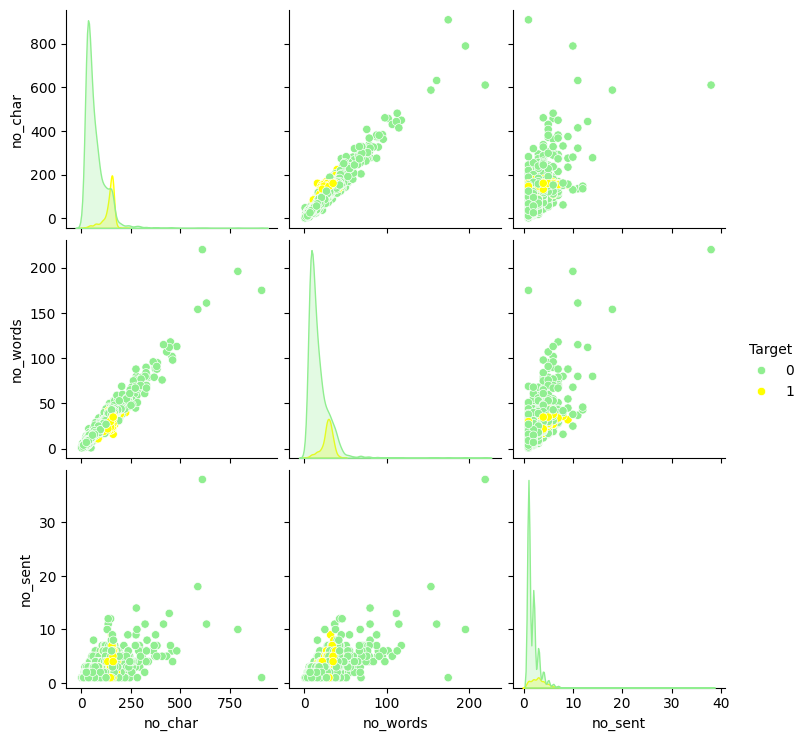

In [21]:
cols = ['lightgreen', 'yellow']
plt.figure(figsize=(12,8))
figure = sns.pairplot(data=spam, hue="Target",palette=cols)
plt.show(figure)

<Axes: >

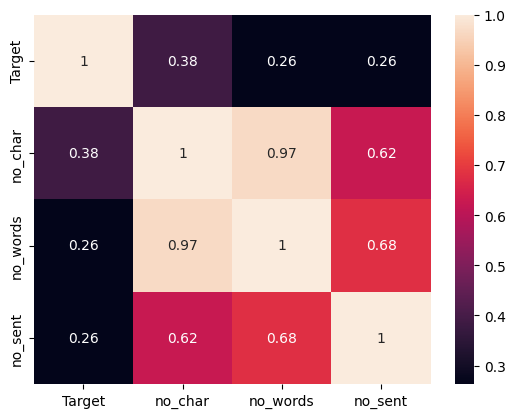

In [22]:
sns.heatmap(spam.corr(numeric_only=True),annot=True)

## Data Preprocessing

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text into individual words
    text = nltk.word_tokenize(text)
    
    # Initialize the Porter Stemmer
    ps = PorterStemmer() 
    
    # Filter out non-alphanumeric tokens
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]  # Copy filtered list
    y.clear()    # Clear the temporary list
    
    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]  # Copy filtered list
    y.clear()    # Clear the temporary list
    
    # Stem the words
    for i in text:
        y.append(ps.stem(i))

    # Return the final processed text as a string
    return " ".join(y)

In [25]:
spam['transformed_text'] = spam['Text'].apply(transform_text)

In [26]:
spam.head()

,Target,Text,no_char,no_words,no_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


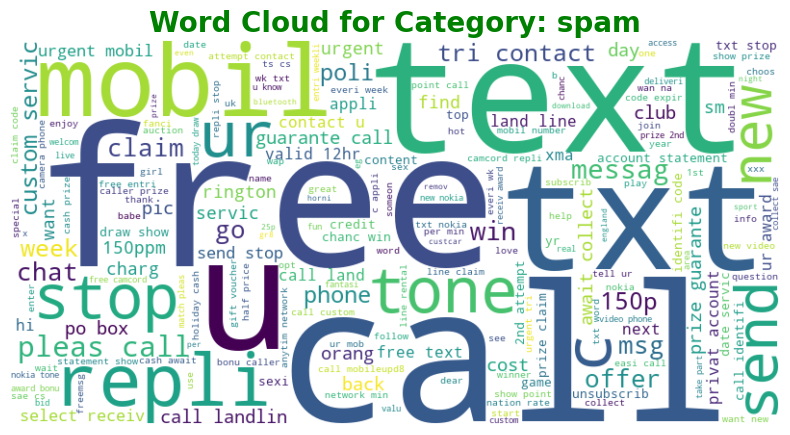

In [27]:
!pip install wordcloud
from wordcloud import WordCloud

spam_wc = WordCloud(width=800, height=400, background_color='white').generate(spam[spam['Target'] == 1]['transformed_text'].str.cat(sep=" "))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear', cmap='viridis')
plt.title('Word Cloud for Category: spam', fontsize=20, fontweight='bold', color='green')
plt.axis('off')  # Hide the axes
plt.show()

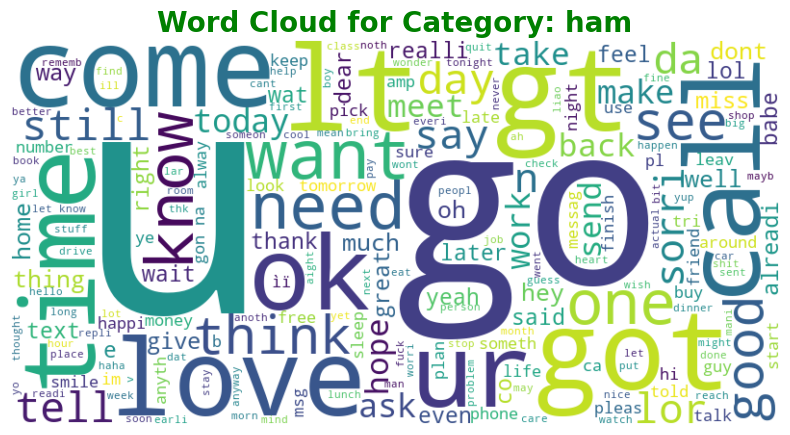

In [28]:
ham_wc = WordCloud(width=800, height=400, background_color='white').generate(spam[spam['Target'] == 0]['transformed_text'].str.cat(sep=" "))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation='bilinear', cmap='viridis')
plt.title('Word Cloud for Category: ham', fontsize=20, fontweight='bold', color='green')
plt.axis('off')  # Hide the axes
plt.show()

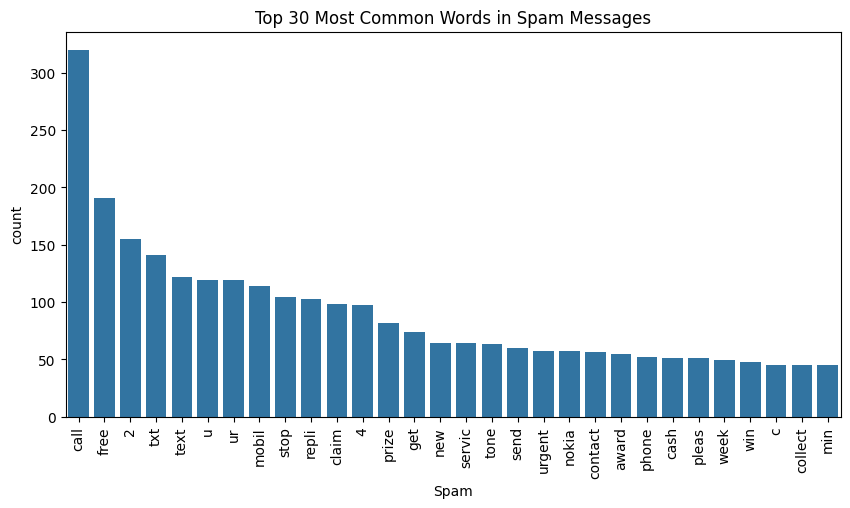

In [29]:
from collections import Counter
# Create the spam corpus from the transformed_text column for spam messages (target == 1)
spam_corpus = spam[spam['Target'] == 1]['transformed_text'].str.cat(sep=" ").split()

# Get the 30 most common words in the spam corpus
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Spam', 'count'])

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='Spam', y='count', data=most_common_words)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()

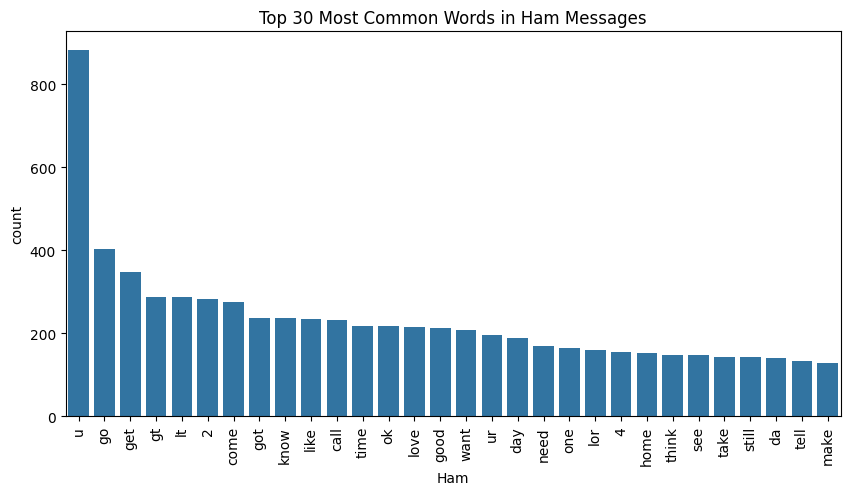

In [30]:
ham_corpus = spam[spam['Target'] == 0]['transformed_text'].str.cat(sep=" ").split()

# Get the 30 most common words in the ham corpus
most_common_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Ham', 'count'])

# Plot the bar chart for ham words
plt.figure(figsize=(10, 5))
sns.barplot(x='Ham', y='count', data=most_common_ham_words)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.title('Top 30 Most Common Words in Ham Messages')
plt.show()

## Modelling

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorizer = TfidfVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(spam['transformed_text']).toarray() 

# Define y
y = spam["Target"].values  

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

classifiers = [LogisticRegression(), MultinomialNB(), RandomForestClassifier(), KNeighborsClassifier()]
clf_dict = { 0: "NaiveBayes", 
             1: "Logistic Regression", 
             2: "RandomForest", 
             3: "KNeighbours",}

## Model Evaluation

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import pandas as pd

# Define classifiers
classifiers = [MultinomialNB(), LogisticRegression(max_iter=1000), RandomForestClassifier(), KNeighborsClassifier()]
clf_dict = {0: "NaiveBayes", 1: "LogisticRegression", 2: "RandomForest", 3: "KNeighbors"}

# List to store evaluation results
evaluation_results = []

# Perform Cross Validation and evaluate metrics for each classifier
for i, model in enumerate(classifiers):
    print(f"Evaluating {clf_dict[i]}...\n")
    
    # Perform 10-fold cross-validation
    cv_score = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=10)
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append results to the list
    evaluation_results.append({
        'Model': clf_dict[i],
        'Cross-Validation Accuracy': cv_score.mean(),
        'Test Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    # Print the results for each model
    print(f"Model: {clf_dict[i]}")
    print(f"Cross-Validation Accuracy: {cv_score.mean():.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print('-' * 50)

# Convert evaluation results into a DataFrame for easy viewing
evaluation_df = pd.DataFrame(evaluation_results)

# Display the results
evaluation_df

Evaluating NaiveBayes...

Model: NaiveBayes
Cross-Validation Accuracy: 0.9524
Test Accuracy: 0.9613
Precision: 0.9625
Recall: 0.9613
F1 Score: 0.9588
--------------------------------------------------
Evaluating LogisticRegression...

Model: LogisticRegression
Cross-Validation Accuracy: 0.9453
Test Accuracy: 0.9487
Precision: 0.9485
Recall: 0.9487
F1 Score: 0.9451
--------------------------------------------------
Evaluating RandomForest...

Model: RandomForest
Cross-Validation Accuracy: 0.9674
Test Accuracy: 0.9671
Precision: 0.9680
Recall: 0.9671
F1 Score: 0.9654
--------------------------------------------------
Evaluating KNeighbors...

Model: KNeighbors
Cross-Validation Accuracy: 0.9008
Test Accuracy: 0.8965
Precision: 0.9076
Recall: 0.8965
F1 Score: 0.8692
--------------------------------------------------


,Model,Cross-Validation Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,NaiveBayes,0.952356,0.961315,0.962518,0.961315,0.958803
1,LogisticRegression,0.945343,0.948743,0.948459,0.948743,0.945100
2,RandomForest,0.967352,0.967118,0.967953,0.967118,0.965369
3,KNeighbors,0.900842,0.896518,0.907635,0.896518,0.869203


In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_smote))

# Define models to evaluate
models = {
    'NaiveBayes': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'KNeighbors': KNeighborsClassifier()
}

# Store evaluation results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract precision, recall, and F1 for class 1 (spam)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']
    
    # Save results in a dictionary
    results.append({
        'Model': model_name,
        'Test Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df

Class distribution before SMOTE: Counter({0: 3627, 1: 508})
Class distribution after SMOTE: Counter({0: 3627, 1: 3627})


,Model,Test Accuracy,Precision,Recall,F1 Score
0,NaiveBayes,0.962282,0.831250,0.917241,0.872131
1,LogisticRegression,0.968085,0.878378,0.896552,0.887372
2,RandomForest,0.973888,0.991667,0.820690,0.898113
3,KNeighbors,0.944874,0.968085,0.627586,0.761506


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],                      # Number of trees in the forest
    'max_depth': [10, 20, 30],                            # Maximum depth of the tree
    'min_samples_split': [2, 5],                          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],                           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']                      # Number of features to consider for splitting
}

# Instantiate RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                              cv=3, n_jobs=-1, verbose=2)

# Fit the model using the grid search
rf_grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters found by GridSearchCV:")
print(rf_grid_search.best_params_)

# Predict on the test set using the best found model
y_pred = rf_grid_search.best_estimator_.predict(X_test)

# Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy after Hyperparameter Tuning: {accuracy * 100:.2f}%")

# Get the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Add accuracy as a new row in the DataFrame
report_df.loc['Accuracy'] = [accuracy, accuracy, accuracy, accuracy]

# Display the DataFrame
print("\nClassification Report as DataFrame:")
report_df

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters found by GridSearchCV:
{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Model Accuracy after Hyperparameter Tuning: 96.32%

Classification Report as DataFrame:


,precision,recall,f1-score,support
0,0.959008,1.000000,0.979075,889.00000
1,1.000000,0.737931,0.849206,145.00000
accuracy,0.963250,0.963250,0.963250,0.96325
macro avg,0.979504,0.868966,0.914141,1034.00000
weighted avg,0.964756,0.963250,0.960863,1034.00000
Accuracy,0.963250,0.963250,0.963250,0.96325


In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB

# Hyperparameter grid
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
}

# RandomizedSearchCV for Naive Bayes
nb_model = MultinomialNB()
nb_random_search = RandomizedSearchCV(nb_model, param_grid_nb, n_iter=10, cv=5, scoring='f1', random_state=42)
nb_random_search.fit(X_train, y_train)

print("Best Parameters for Naive Bayes:", nb_random_search.best_params_)

Best Parameters for Naive Bayes: {'alpha': 0.1}


In [53]:
# Retrain Naive Bayes with best alpha
best_nb_model = MultinomialNB(alpha=0.1)
best_nb_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_nb = best_nb_model.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

print(f"Naive Bayes with alpha=0.1 - Test Accuracy: {nb_accuracy:.4f}, Precision: {nb_precision:.4f}, Recall: {nb_recall:.4f}, F1 Score: {nb_f1:.4f}")

Naive Bayes with alpha=0.1 - Test Accuracy: 0.9758, Precision: 0.9167, Recall: 0.9103, F1 Score: 0.9135


In [55]:
from sklearn.linear_model import LogisticRegression

# Hyperparameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2']
}

# RandomizedSearchCV for Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_random_search = RandomizedSearchCV(lr_model, param_grid_lr, n_iter=10, cv=5, scoring='f1', random_state=42)
lr_random_search.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", lr_random_search.best_params_)

Best Parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}


In [57]:
# Retrain Logistic Regression with best parameters
best_lr_model = LogisticRegression(solver='liblinear', penalty='l2', C=100, max_iter=1000, random_state=42)
best_lr_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_lr = best_lr_model.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print(f"Logistic Regression (best params) - Test Accuracy: {lr_accuracy:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1 Score: {lr_f1:.4f}")

Logistic Regression (best params) - Test Accuracy: 0.9758, Precision: 0.9688, Recall: 0.8552, F1 Score: 0.9084


In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# RandomizedSearchCV for KNeighbors
knn_model = KNeighborsClassifier()
knn_random_search = RandomizedSearchCV(knn_model, param_grid_knn, n_iter=10, cv=5, scoring='f1', random_state=42)
knn_random_search.fit(X_train, y_train)

print("Best Parameters for K-Nearest Neighbors:", knn_random_search.best_params_)

Best Parameters for K-Nearest Neighbors: {'weights': 'distance', 'p': 1, 'n_neighbors': 3}


In [61]:
# Retrain K-Nearest Neighbors with best parameters
best_knn_model = KNeighborsClassifier(weights='distance', p=1, n_neighbors=3)
best_knn_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_knn = best_knn_model.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors (best params) - Test Accuracy: {knn_accuracy:.4f}, Precision: {knn_precision:.4f}, Recall: {knn_recall:.4f}, F1 Score: {knn_f1:.4f}")

K-Nearest Neighbors (best params) - Test Accuracy: 0.9246, Precision: 1.0000, Recall: 0.4621, F1 Score: 0.6321


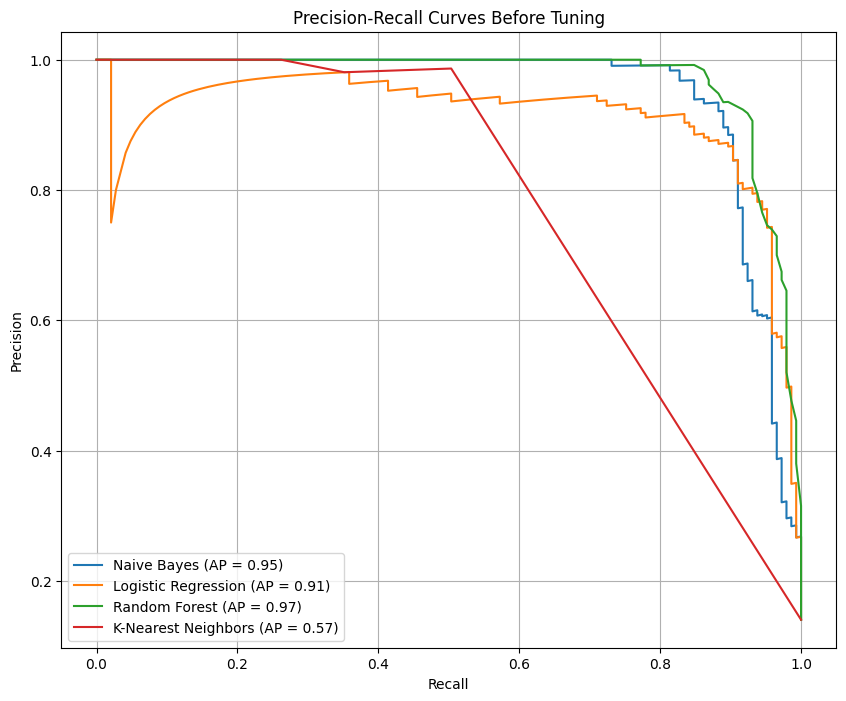

In [69]:
# Models before hyperparameter tuning
before_tuning_models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Plot Precision-Recall curve before tuning
plt.figure(figsize=(10, 8))
for model_name, model in before_tuning_models.items():
    model.fit(X_train, y_train)  # Train the model
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]  # Probability estimates for precision-recall curve
    else:
        y_scores = model.decision_function(X_test)  # Use decision_function for models without predict_proba

    precision, recall, _ = precision_recall_curve(y_test, y_scores)  # Compute precision-recall values
    average_precision = average_precision_score(y_test, y_scores)  # Compute average precision score
    
    # Plot Precision-Recall curve for the model
    plt.plot(recall, precision, label=f"{model_name} (AP = {average_precision:.2f})")

# Add labels and legend to the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves Before Tuning')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

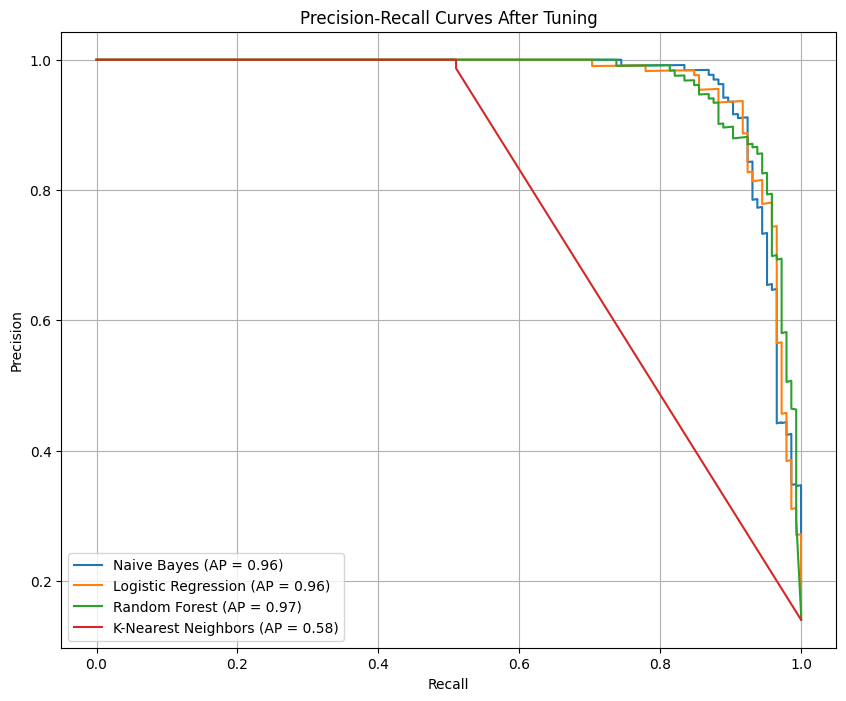

In [71]:
# Models after hyperparameter tuning
after_tuning_models = {
    'Naive Bayes': MultinomialNB(alpha=0.1),
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l2', C=100, random_state=42),
    'Random Forest': RandomForestClassifier(
        max_depth=30, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42
    ),
    'K-Nearest Neighbors': KNeighborsClassifier(weights='distance', p=1, n_neighbors=3)
}

# Plot Precision-Recall curve after tuning
plt.figure(figsize=(10, 8))
for model_name, model in after_tuning_models.items():
    model.fit(X_train, y_train)  # Train the model
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]  # Probability estimates for precision-recall curve
    else:
        y_scores = model.decision_function(X_test)  # Use decision_function for models without predict_proba

    precision, recall, _ = precision_recall_curve(y_test, y_scores)  # Compute precision-recall values
    average_precision = average_precision_score(y_test, y_scores)  # Compute average precision score
    
    # Plot Precision-Recall curve for the model
    plt.plot(recall, precision, label=f"{model_name} (AP = {average_precision:.2f})")

# Add labels and legend to the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves After Tuning')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [75]:
results = []

# Loop through the models after tuning and evaluate their performance
for model_name, model in after_tuning_models.items():
    model.fit(X_train, y_train)  # Train the model

    # Get predictions
    y_pred = model.predict(X_test)

    # Get the scores (probabilities or decision function)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_scores)
    
    # Append results to the list
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Average Precision Score': average_precision
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,Model,Accuracy,Precision,Recall,F1 Score,Average Precision Score
0,Naive Bayes,0.975822,0.916667,0.910345,0.913495,0.964033
1,Logistic Regression,0.975822,0.968750,0.855172,0.908425,0.964486
2,Random Forest,0.963250,1.000000,0.737931,0.849206,0.966584
3,K-Nearest Neighbors,0.924565,1.000000,0.462069,0.632075,0.579010


## Building a predictive system

In [ ]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(spam['Text']).toarray()
y = spam['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

# building a predictive system
def classify_message(message):

    message_cleaned = transform_text(message.lower())
    message_vectorized = tfidf.transform([message_cleaned]).toarray()  # Vectorize the cleaned message
    prediction = model.predict(message_vectorized)  
    return 'Spam' if prediction == 1 else 'Ham'

# Test the predictive system with a new message
new_message = "WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."
print(f"Message: {new_message}")
print(f"Prediction: {classify_message(new_message)}")

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

# building a predictive system
def classify_message(message):

    message_cleaned = transform_text(message.lower())
    message_vectorized = tfidf.transform([message_cleaned]).toarray()  # Vectorize the cleaned message
    prediction = model.predict(message_vectorized)  
    return 'Spam' if prediction == 1 else 'Ham'

new_message = "Ahhh. Work. I vaguely remember that! What does it feel like? Lol"
print(f"Message: {new_message}")
print(f"Prediction: {classify_message(new_message)}")
